# scikit-learn Toy data sets

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-requirements" data-toc-modified-id="Pre-requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pre-requirements</a></span><ul class="toc-item"><li><span><a href="#Import-dependencies" data-toc-modified-id="Import-dependencies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import dependencies</a></span></li><li><span><a href="#Notebook-configuration" data-toc-modified-id="Notebook-configuration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notebook configuration</a></span></li><li><span><a href="#Package-configuration" data-toc-modified-id="Package-configuration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Package configuration</a></span></li></ul></li><li><span><a href="#Data-set-generation" data-toc-modified-id="Data-set-generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data set generation</a></span></li><li><span><a href="#CNN-clustering-with-data-points-as-input" data-toc-modified-id="CNN-clustering-with-data-points-as-input-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CNN clustering with data points as input</a></span></li><li><span><a href="#CNN-clustering-with-pre-computed-distances" data-toc-modified-id="CNN-clustering-with-pre-computed-distances-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CNN clustering with pre-computed distances</a></span></li><li><span><a href="#CNN-clustering-with-pre-computed-neighbourhoods" data-toc-modified-id="CNN-clustering-with-pre-computed-neighbourhoods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CNN clustering with pre-computed neighbourhoods</a></span></li></ul></div>

## Pre-requirements

### Import dependencies

In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cluster   # Forked at https://github.com/janjoswig/scikit-learn
from sklearn import datasets  # For sklearn test data set creation
from sklearn.preprocessing import StandardScaler

import cnnclustering.cnn as cnn  # CNN clustering

This notebook was created using Python 3.8.

In [2]:
# Version information
print(sys.version)

3.8.3 (default, May 15 2020, 15:24:35) 
[GCC 8.3.0]


### Notebook configuration

In [8]:
# Matplotlib configuration
mpl.rc_file(
    "matplotlibrc",
    use_default_template=False
)

In [6]:
# Axis property defaults for the plots
ax_props = {
    "xlabel": None,
    "ylabel": None,
    "xlim": (-2.5, 2.5),
    "ylim": (-2.5, 2.5),
    "xticks": (),
    "yticks": (),
    "aspect": "equal"
}

# Line plot property defaults
line_props = {
    "linewidth": 0,
    "marker": '.',
}

Optionally, clustering results can be nicely collected in a `pandas` data frame.

### Package configuration

In [6]:
# Configuration file found?
cnn.settings.cfgfile  # If None, no file is provided

In [31]:
# Display default settings
cnn.settings.defaults

{'default_cnn_cutoff': '1',
 'default_cnn_offset': '0',
 'default_radius_cutoff': '1',
 'default_member_cutoff': '2',
 'default_fit_policy': 'conservative',
 'float_precision': 'sp',
 'int_precision': 'sp'}

## Data set generation

To see the CNN clustering in action, let's have a look at a handful of basic 2D data sets from scikit-learn (like from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html).

In [2]:
# Data set generation parameters
np.random.seed(0)
n_samples = 2000

In [3]:
# Data set generation
# circles
noisy_circles, _ = datasets.make_circles(
    n_samples=n_samples,
    factor=.5,
    noise=.05
    )

# moons
noisy_moons, _ = datasets.make_moons(
    n_samples=n_samples,
    noise=.05
    )

# blobs
blobs, _ = datasets.make_blobs(
    n_samples=n_samples,
    random_state=8
    )

# None
no_structure = np.random.rand(
    n_samples, 2
    )

# aniso
random_state = 170
X, y = datasets.make_blobs(
    n_samples=n_samples,
    random_state=random_state
    )

transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X, transformation)

# varied
varied, _ = datasets.make_blobs(
    n_samples=n_samples,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=random_state
    )

In [4]:
# Define cluster parameters
dsets = [ # "name", set, **parameters
    ('circles', noisy_circles, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 100,
        'max_clusters': None
        }),
    ('moons', noisy_moons, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 2,
        'max_clusters': None
        }),
    ('varied', varied, {
        'radius_cutoff': 0.28,
        'cnn_cutoff': 20,
        'member_cutoff': 20,
        'max_clusters': None
        }),
    ('aniso', aniso, {
        'radius_cutoff': 0.29,
        'cnn_cutoff': 30,
        'member_cutoff': 5,
        'max_clusters': None
         }),
    ('blobs', blobs, {
        'radius_cutoff': 0.4,
        'cnn_cutoff': 20,
        'member_cutoff': 2,
        'max_clusters': None
        }),
    ('None', no_structure, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 1,
        'max_clusters': None
        }),
    ]

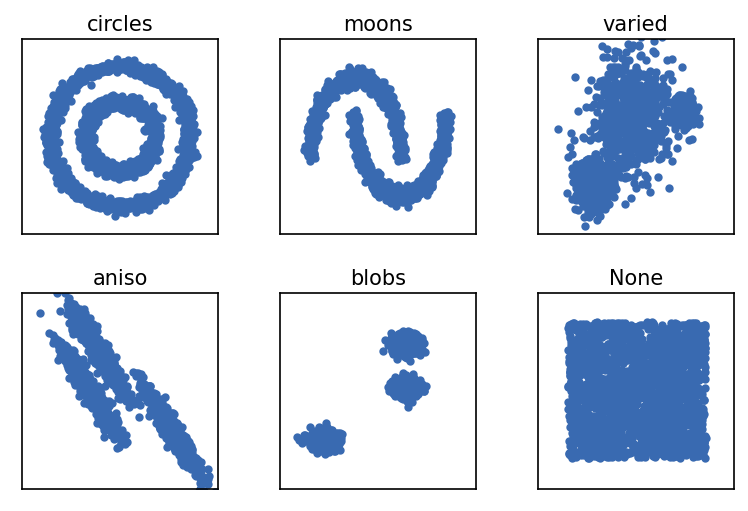

In [9]:
# Plot the original data sets
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, *_) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)
    # Plot
    Ax[count].plot(data[:, 0], data[:, 1], **line_props)
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )


## CNN clustering with data points as input

Execution time for call of fit: 0 hours, 0 minutes, 0.2897 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        100       None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.3340 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        2         None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.6569 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest

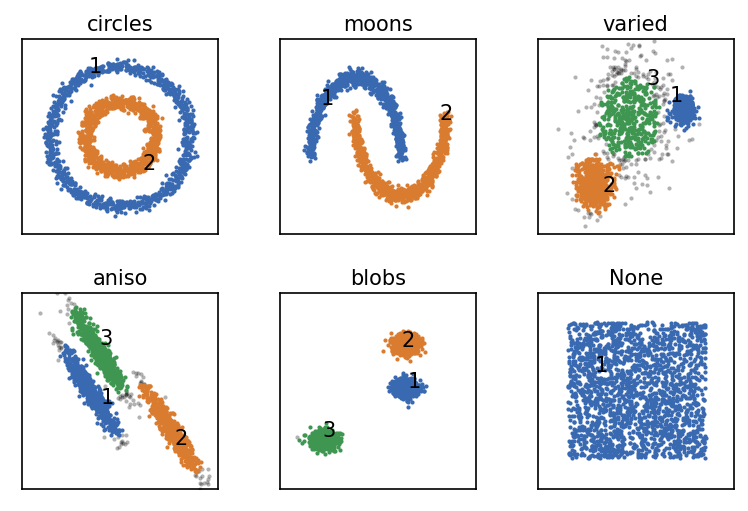

In [24]:
# Cluster the sets and plot the result
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, params) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)

    clustering = cnn.CNN(points=data)
    # Calculate neighbours on-the-fly
    clustering.fit(**params, policy="conservative")
    print()

    # Plot
    clustering.evaluate(ax=Ax[count], annotate_pos="random")
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )

## CNN clustering with pre-computed distances

Execution time for call of fit: 0 hours, 0 minutes, 0.1107 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        100       None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.1571 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        2         None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.2057 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest

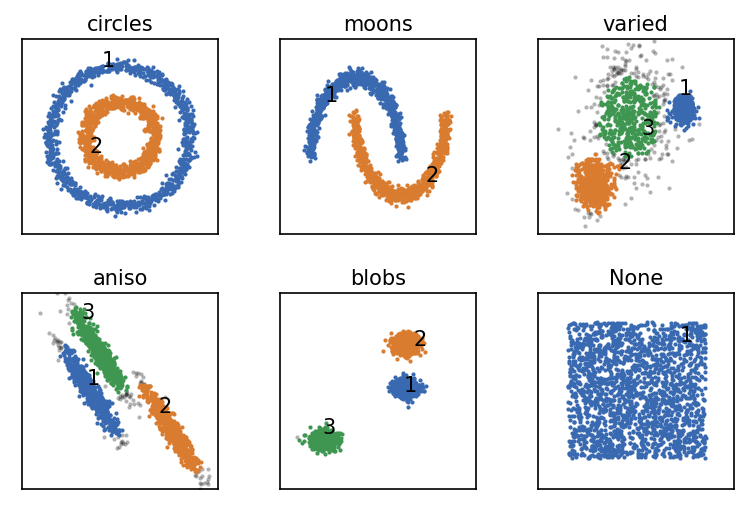

In [29]:
# Cluster the sets and plot the result
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, params) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)

    clustering = cnn.CNN(points=data)
    clustering.calc_dist()  # Pre-calculate distances from points
    # Calculate neighbours on-the-fly
    clustering.fit(**params, policy="conservative")
    print()

    # Plot
    clustering.evaluate(ax=Ax[count], annotate_pos="random")
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )

## CNN clustering with pre-computed neighbourhoods

Execution time for call of fit: 0 hours, 0 minutes, 0.0118 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        100       None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.0116 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest  %noise    
2000      0.500     20        2         None      2         0.500     0.000     
--------------------------------------------------------------------------------

Execution time for call of fit: 0 hours, 0 minutes, 0.0123 seconds
--------------------------------------------------------------------------------
#points   R         C         min       max       #clusters %largest

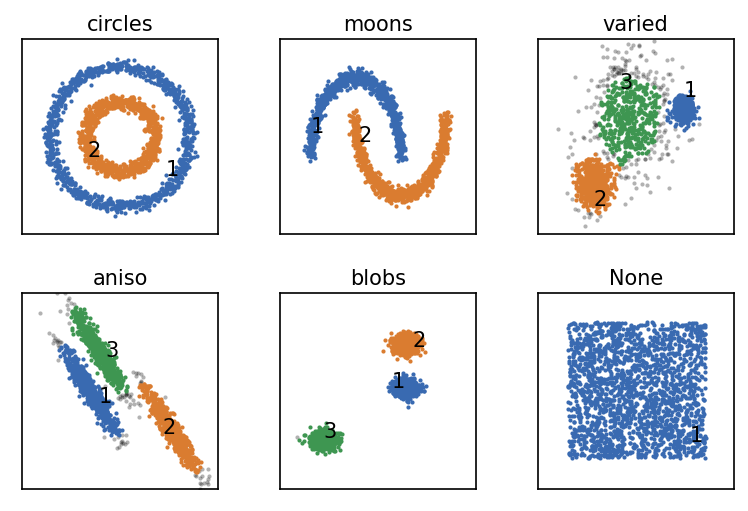

In [35]:
# Cluster the sets and plot the result
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, params) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)

    clustering = cnn.CNN(points=data)
    clustering.data.points.cKDTree()  # Build search tree on points
    clustering.calc_neighbours_from_cKDTree(params["radius_cutoff"])
    clustering.fit(**params)  # Fit from precomputed neighbourhoods
    print()

    # Plot
    clustering.evaluate(ax=Ax[count], annotate_pos="random")
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )